In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set plot style for better aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df=pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
# Get information about the dataframe
if 'df' in locals():
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [4]:
# Clean 'price' and 'service fee' columns
if 'df' in locals():
    # For price and service fee, they are sometimes formatted like '$1,200'.
    # We need to remove '$' and ',' before converting to numeric.
    for col in ['price', 'service fee']:
        # Using .loc to avoid SettingWithCopyWarning
        df.loc[:, col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        # Convert to numeric, coercing errors to NaN
        df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

    print("Cleaned 'price' and 'service fee' columns and converted to numeric.")

Cleaned 'price' and 'service fee' columns and converted to numeric.


In [5]:
# Handle Missing Values
if 'df' in locals():
    # Fill 'reviews per month' with 0
    df['reviews per month'].fillna(0, inplace=True)

    # For 'service fee', let's fill with the mean
    mean_service_fee = df['service fee'].mean()
    df['service fee'].fillna(mean_service_fee, inplace=True)

    # Drop columns that are not needed or have too many missing values for this analysis
    # The columns 'license' and 'house_rules' were not present after reading the excel file.
    # df.drop(['license', 'house_rules'], axis=1, inplace=True)

    # Drop rows where critical columns like 'price' or 'neighbourhood group' are missing
    df.dropna(subset=['price', 'neighbourhood group', 'host name', 'NAME'], inplace=True)

    print("Missing values handled.")

Missing values handled.


In [6]:
if 'df' in locals():
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
    print("Converted 'last review' to datetime.")

Converted 'last review' to datetime.


In [7]:
if 'df' in locals():
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    final_rows = len(df)
    print(f"Removed {initial_rows - final_rows} duplicate rows.")

Removed 539 duplicate rows.


In [8]:
# Display info of the cleaned dataframe
if 'df' in locals():
    print("\nCleaned DataFrame Info:")
    df.info()


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 101124 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101124 non-null  int64         
 1   NAME                            101124 non-null  object        
 2   host id                         101124 non-null  int64         
 3   host_identity_verified          100859 non-null  object        
 4   host name                       101124 non-null  object        
 5   neighbourhood group             101124 non-null  object        
 6   neighbourhood                   101109 non-null  object        
 7   lat                             101116 non-null  float64       
 8   long                            101116 non-null  float64       
 9   country                         100604 non-null  object        
 10  country code                    1010

Q1. What is the average price of an Airbnb listing in each neighbourhood group?

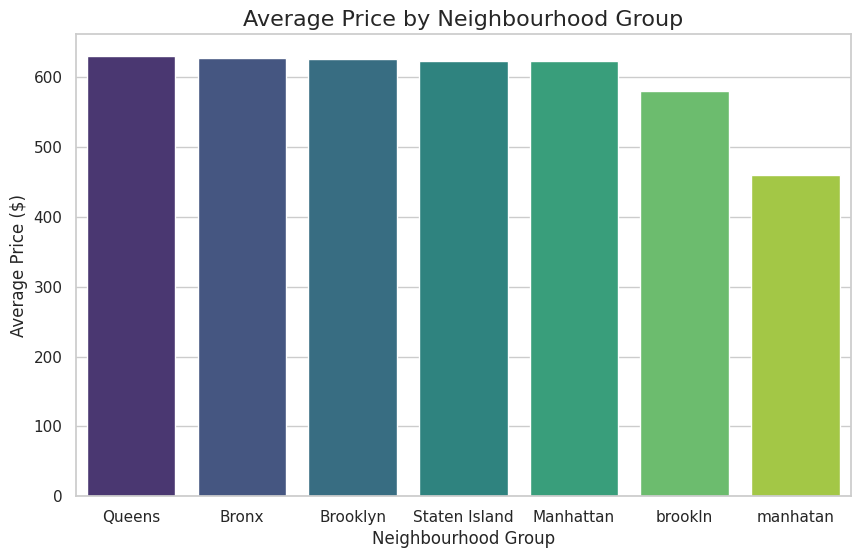

In [9]:
if 'df' in locals():
    # Calculate the average price per neighbourhood group
    avg_price_by_neighbourhood = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values, palette='viridis')
    plt.title('Average Price by Neighbourhood Group', fontsize=16)
    plt.xlabel('Neighbourhood Group', fontsize=12)
    plt.ylabel('Average Price ($)', fontsize=12)
    plt.show()

Q2. How does the room type affect the price of an Airbnb listing?

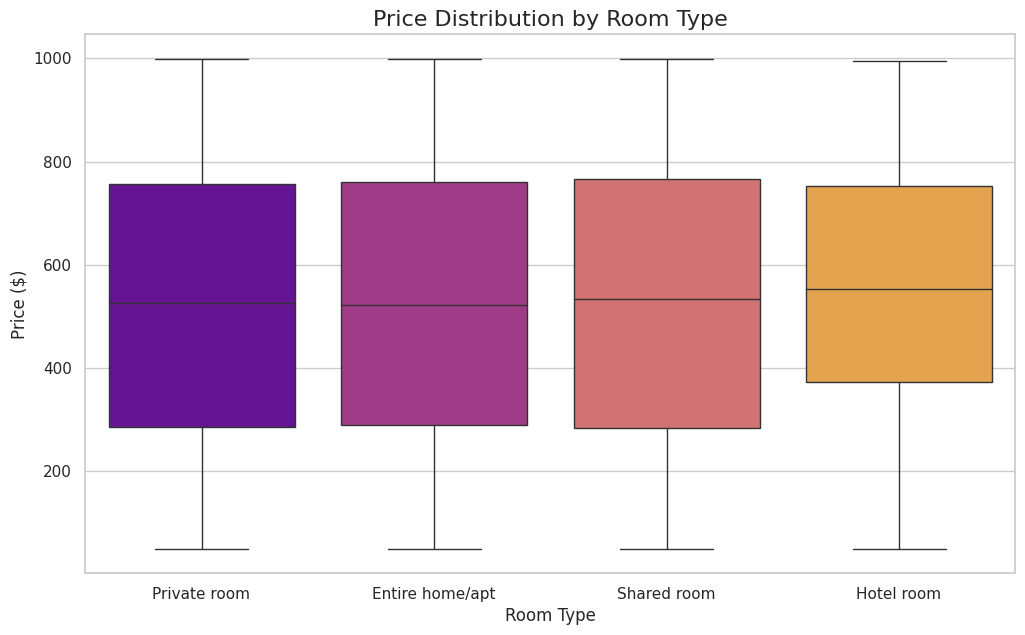

In [10]:
if 'df' in locals():
    plt.figure(figsize=(12, 7))
    # Using a subset of data for the boxplot to avoid extreme outliers making it unreadable
    sns.boxplot(x='room type', y='price', data=df[df['price'] < 1000], palette='plasma')
    plt.title('Price Distribution by Room Type', fontsize=16)
    plt.xlabel('Room Type', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.show()

Q3. What is the distribution of Airbnb listings across different neighbourhood groups?

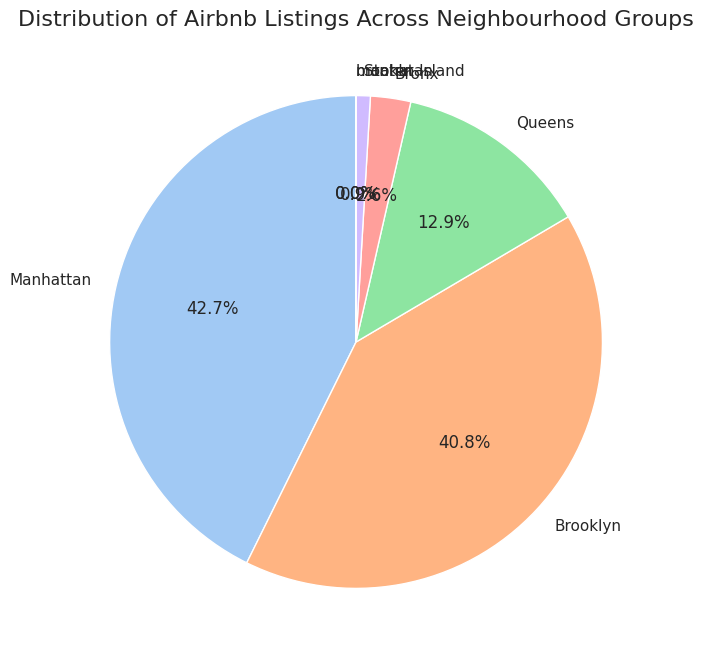

In [11]:
if 'df' in locals():
    # Count the listings in each neighbourhood group
    neighbourhood_counts = df['neighbourhood group'].value_counts()

    # Create the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(neighbourhood_counts, labels=neighbourhood_counts.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'))
    plt.title('Distribution of Airbnb Listings Across Neighbourhood Groups', fontsize=16)
    plt.ylabel(' ') # Hides the 'neighbourhood group' label on the y-axis
    plt.show()

Q4. How does the availability of a listing vary?

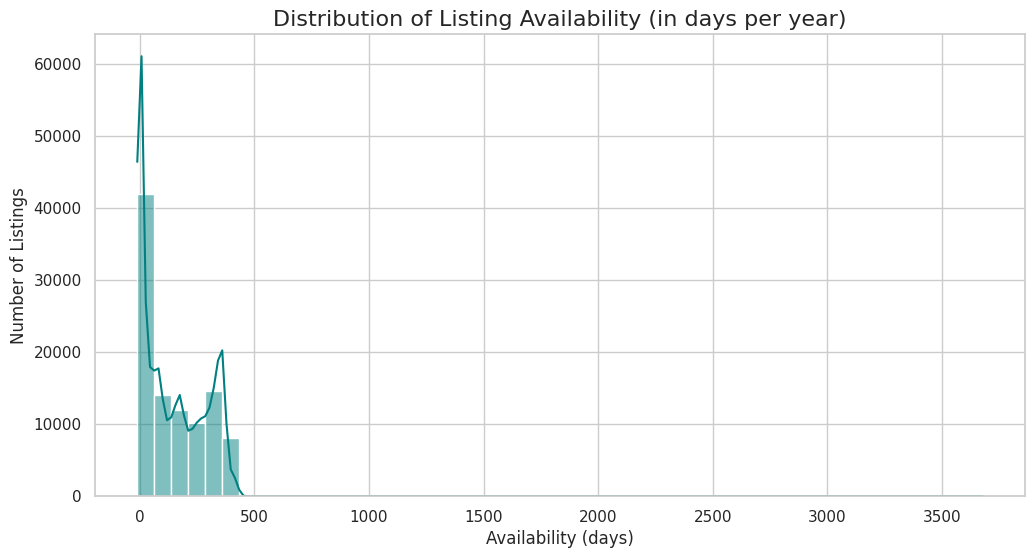

In [12]:
if 'df' in locals():
    plt.figure(figsize=(12, 6))
    sns.histplot(df['availability 365'], bins=50, kde=True, color='teal')
    plt.title('Distribution of Listing Availability (in days per year)', fontsize=16)
    plt.xlabel('Availability (days)', fontsize=12)
    plt.ylabel('Number of Listings', fontsize=12)
    plt.show()

Q5. What is the correlation between the number of reviews and the price of an Airbnb listing?


The correlation between number of reviews and price is: 0.0052


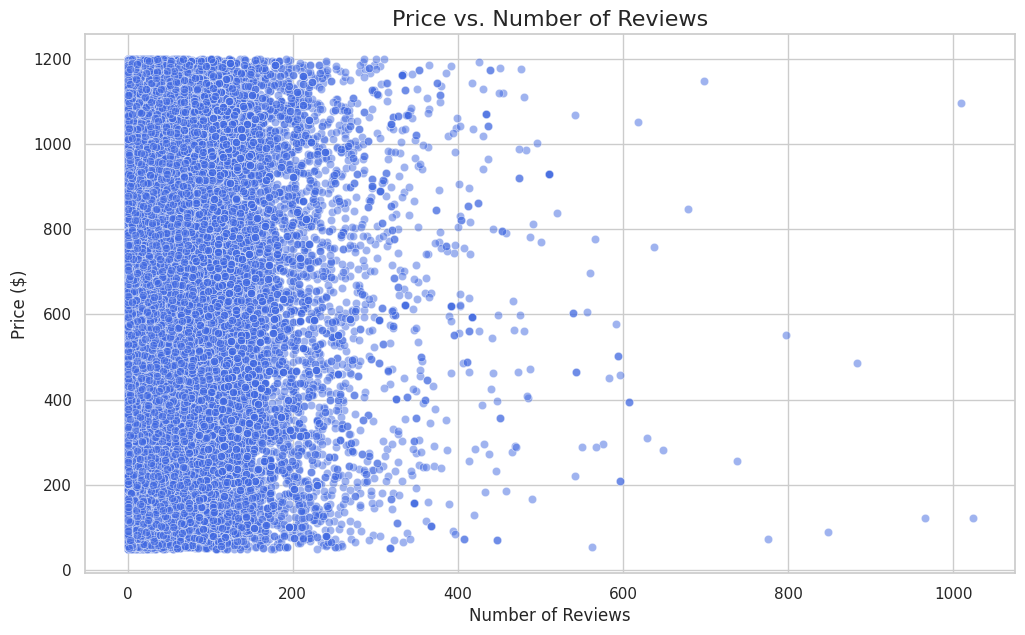

In [13]:
if 'df' in locals():
    plt.figure(figsize=(12, 7))
    # We'll again filter out extreme prices for better visualization
    sns.scatterplot(x='number of reviews', y='price', data=df[df['price'] < 1500], alpha=0.5, color='royalblue')
    plt.title('Price vs. Number of Reviews', fontsize=16)
    plt.xlabel('Number of Reviews', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)

    # Calculate correlation
    correlation = df[['number of reviews', 'price']].corr().iloc[0, 1]
    print(f"The correlation between number of reviews and price is: {correlation:.4f}")

    plt.show()

Q6. What is the distribution of cancellation policies among the listings?


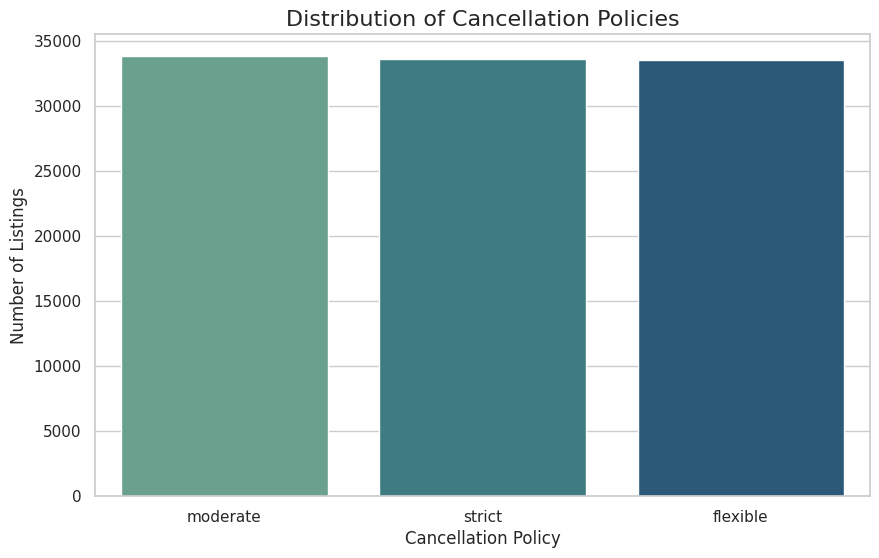

In [14]:
# Create a count plot for the 'cancellation_policy' column
plt.figure(figsize=(10, 6))
sns.countplot(x='cancellation_policy', data=df, order=df['cancellation_policy'].value_counts().index, palette='crest')

plt.title('Distribution of Cancellation Policies', fontsize=16)
plt.xlabel('Cancellation Policy', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.show()

Q7. How does the instant_bookable feature relate to the price of a listing?


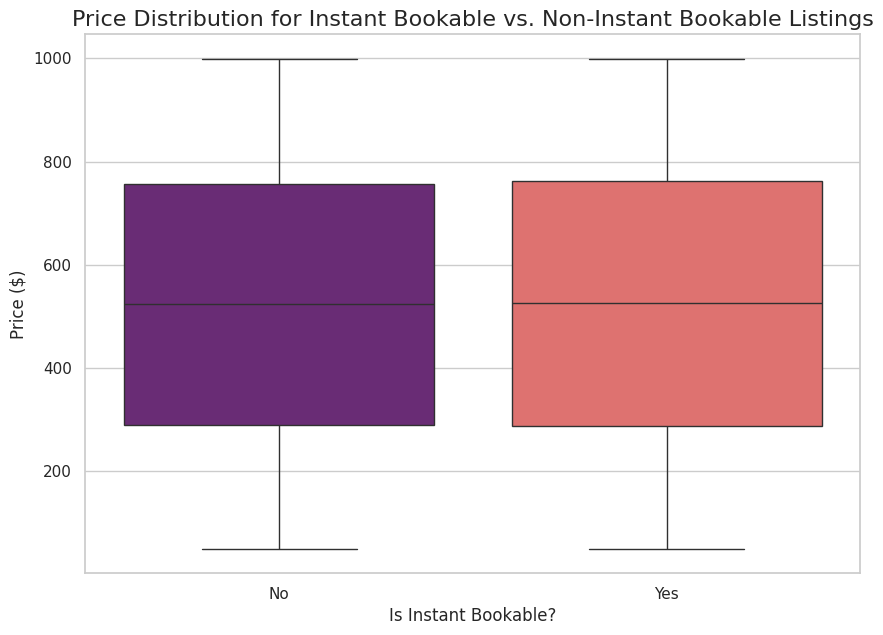

In [15]:
# Create a box plot to compare prices for instant_bookable and non-instant_bookable listings
# We'll filter the price again to keep the plot readable
plt.figure(figsize=(10, 7))
sns.boxplot(x='instant_bookable', y='price', data=df[df['price'] < 1000], palette='magma')

plt.title('Price Distribution for Instant Bookable vs. Non-Instant Bookable Listings', fontsize=16)
plt.xlabel('Is Instant Bookable?', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes']) # Rename x-axis ticks for clarity
plt.show()

Q8. Who are the top 10 hosts with the most listings?


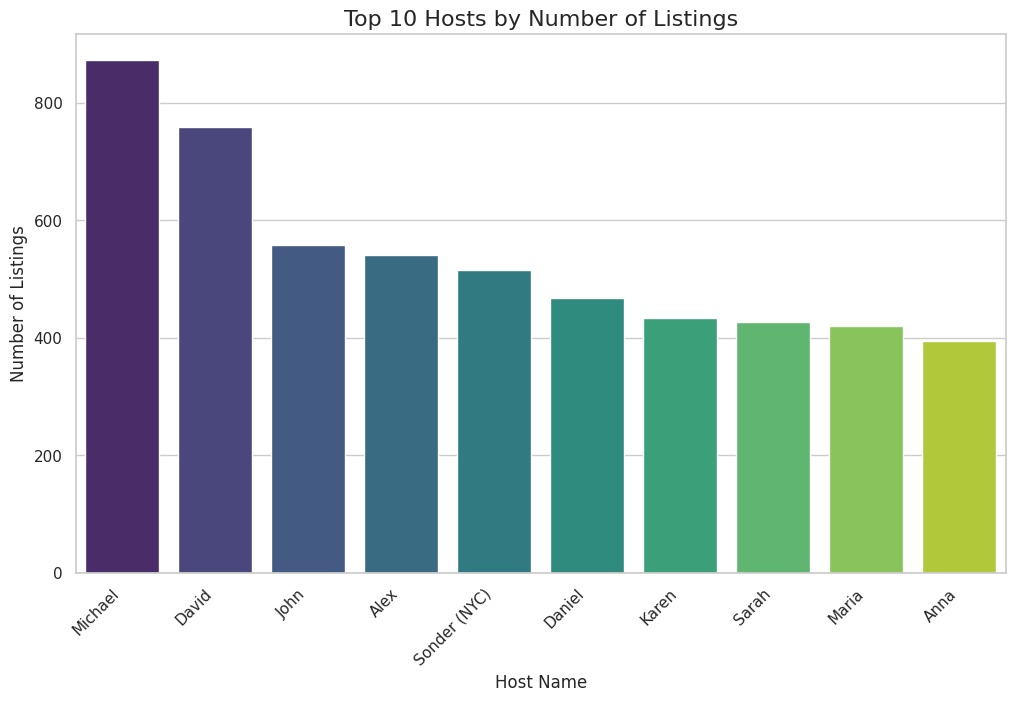

In [16]:
# Get the top 10 hosts by listing count
top_10_hosts = df['host name'].value_counts().nlargest(10)

# Create a bar plot for the top 10 hosts
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_hosts.index, y=top_10_hosts.values, palette='viridis')

plt.title('Top 10 Hosts by Number of Listings', fontsize=16)
plt.xlabel('Host Name', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

Q9. What is the distribution of listings based on their construction year?


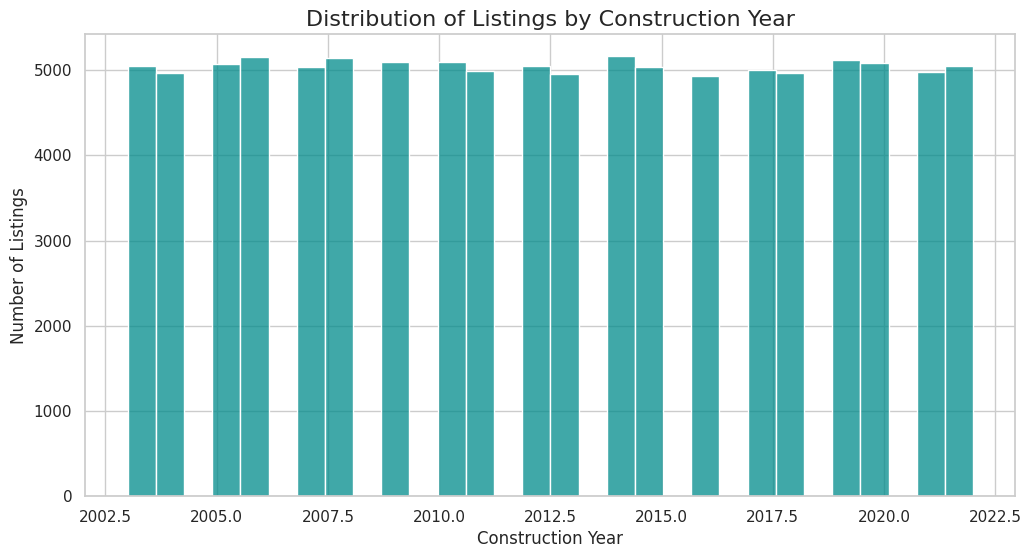

In [17]:
# Create a histogram for the 'Construction year' column
# We'll filter out any potential incorrect years (e.g., future dates if any)
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Construction year'] <= 2023]['Construction year'], bins=30, kde=False, color='darkcyan')

plt.title('Distribution of Listings by Construction Year', fontsize=16)
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.show()

Geographical Distribution of Listings

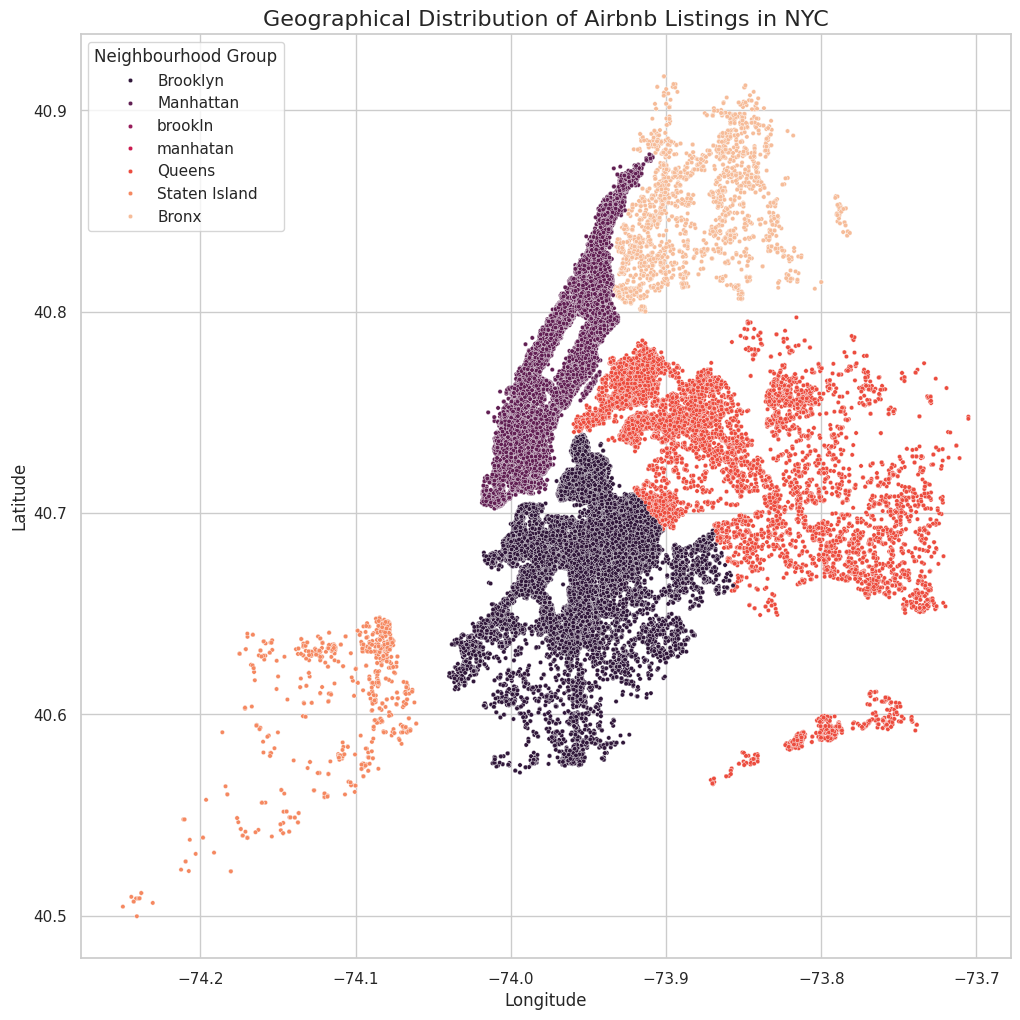

In [18]:
if 'df' in locals():
    plt.figure(figsize=(12, 12))
    sns.scatterplot(x='long', y='lat', hue='neighbourhood group', s=10, data=df, palette='rocket')
    plt.title('Geographical Distribution of Airbnb Listings in NYC', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.legend(title='Neighbourhood Group')
    plt.show()